# 1. Load and Explore the Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("./Data/Chocolate Sales.csv")

# Show the first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Check data types
print(df.dtypes)

     Sales Person    Country              Product       Date    Amount  \
0  Jehu Rudeforth         UK      Mint Chip Choco  04-Jan-22   $5,320    
1     Van Tuxwell      India        85% Dark Bars  01-Aug-22   $7,896    
2    Gigi Bohling      India  Peanut Butter Cubes  07-Jul-22   $4,501    
3    Jan Morforth  Australia  Peanut Butter Cubes  27-Apr-22  $12,726    
4  Jehu Rudeforth         UK  Peanut Butter Cubes  24-Feb-22  $13,685    

   Boxes Shipped  
0            180  
1             94  
2             91  
3            342  
4            184  
Sales Person     0
Country          0
Product          0
Date             0
Amount           0
Boxes Shipped    0
dtype: int64
Sales Person     object
Country          object
Product          object
Date             object
Amount           object
Boxes Shipped     int64
dtype: object


In [2]:
# Remove "$" and convert "Amount" to float
df["Amount"] = df["Amount"].str.replace(r"[$,]", "", regex=True).astype(float)

# Convert "Amount" column to numeric, replacing errors with NaN
df["Amount"] = pd.to_numeric(df["Amount"], errors="coerce")

# 2. Sales Performance by Salesperson (Bar Chart)

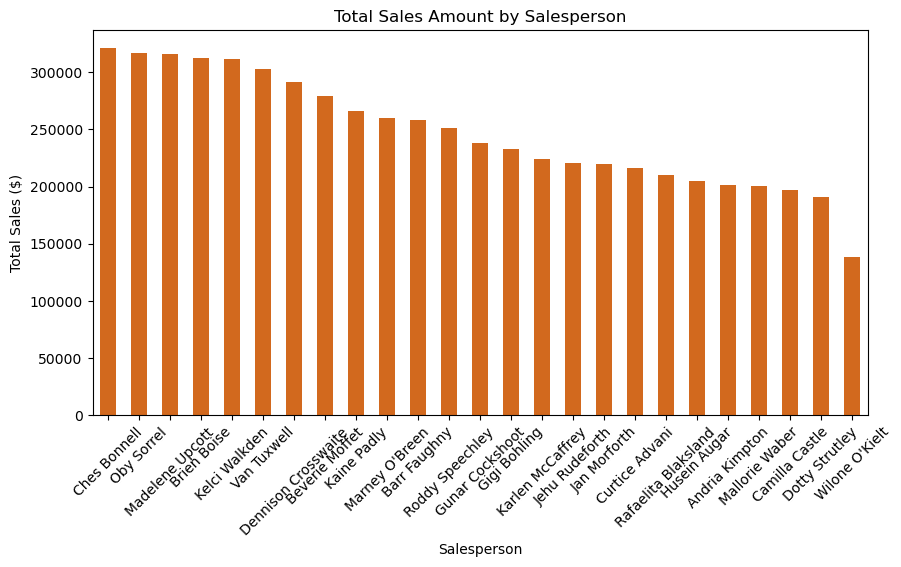

In [3]:
# Group sales by Sales Person
sales_by_person = df.groupby("Sales Person")["Amount"].sum().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(10, 5))
sales_by_person.plot(kind="bar", color="chocolate")
plt.title("Total Sales Amount by Salesperson")
plt.xlabel("Salesperson")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)
plt.show()

# 3. Sales Distribution by Country (Pie Chart)

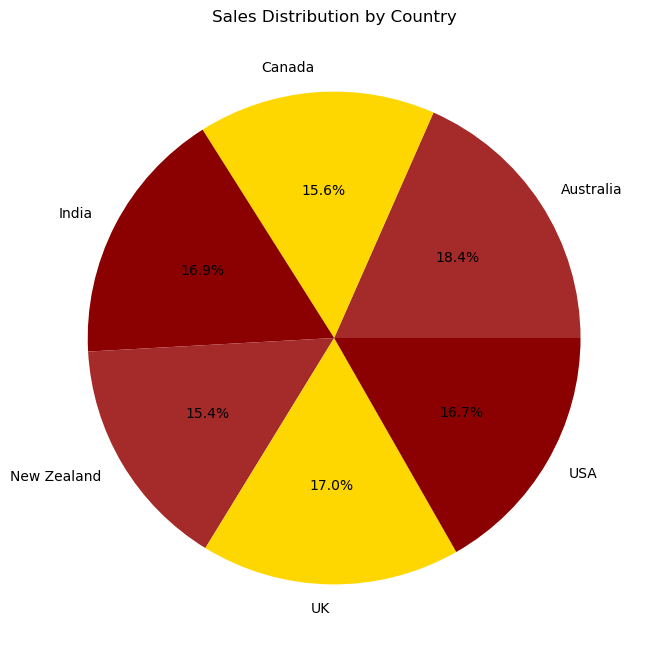

In [4]:
# Group sales by country
sales_by_country = df.groupby("Country")["Amount"].sum()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sales_by_country, labels=sales_by_country.index, autopct='%1.1f%%', colors=["brown", "gold", "darkred"])
plt.title("Sales Distribution by Country")
plt.show()

# 4. Trend of Sales Over Time (Line Chart)

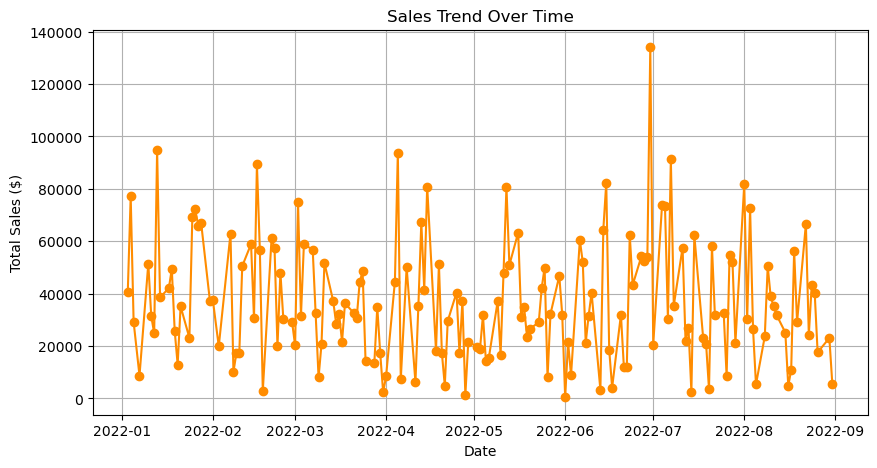

In [5]:
# Convert Date column to datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Group by Date and sum the amount
sales_trend = df.groupby("Date")["Amount"].sum()

# Plot the line chart
plt.figure(figsize=(10, 5))
plt.plot(sales_trend.index, sales_trend.values, marker='o', linestyle='-', color="darkorange")
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales ($)")
plt.grid(True)
plt.show()

# 5. Heatmap: Sales by Country and Product

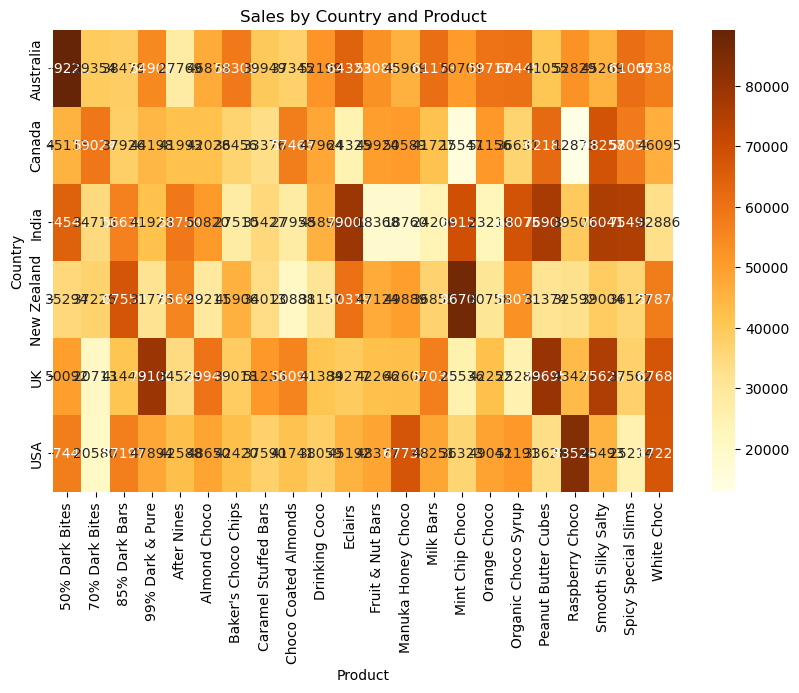

In [6]:
# Pivot table for heatmap
country_product_sales = df.pivot_table(values="Amount", index="Country", columns="Product", aggfunc="sum")

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(country_product_sales, cmap="YlOrBr", annot=True, fmt=".0f")
plt.title("Sales by Country and Product")
plt.xlabel("Product")
plt.ylabel("Country")
plt.show()